In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Problema 1

In [2]:
def channeler(image, channel_code):
    img = cv2.imread("battletech.jpg")
    channels = {
        1:np.array([0,0,1]),  #blue
        2:np.array([0,1,0]),  #green
        3:np.array([1,0,0]),  #red
        10:np.array([1,1,0]), #red and green
        20:np.array([0,1,1]), #blue and green
        30:np.array([1,0,1])  #red and blue
    }
    colour_code = channels.get(channel_code, np.zeros(1))
    if (not colour_code.any()):
        raise Exception("Choose a proper channel_code: 1, 2, 3, 10, 20 or 30") 
        
    for i in range(3):
        img[:, :, i] = img[:, :, i]*colour_code[i]
    
    return img

<center>Imagen original:</center>

![Original](battletech.jpg "Battletech")

(-0.5, 1023.5, 1582.5, -0.5)

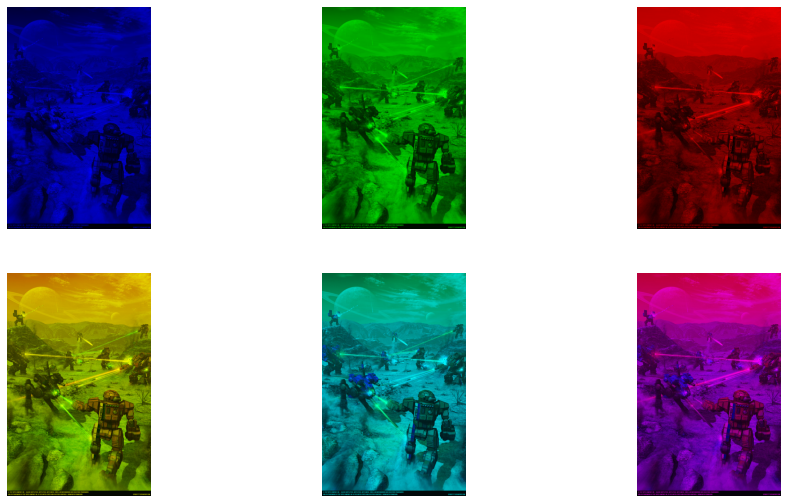

In [3]:
filename = "battletech.jpg"
f, axarr = plt.subplots(2,3, figsize=(16,9)) 

axarr[0,0].imshow(channeler(filename, 1))
axarr[0,0].axis('off')
axarr[0,1].imshow(channeler(filename, 2))
axarr[0,1].axis('off')
axarr[0,2].imshow(channeler(filename, 3))
axarr[0,2].axis('off')
axarr[1,0].imshow(channeler(filename, 10))
axarr[1,0].axis('off')
axarr[1,1].imshow(channeler(filename, 20))
axarr[1,1].axis('off')
axarr[1,2].imshow(channeler(filename, 30))
axarr[1,2].axis('off')

# Problema 2

In [4]:
def grey3d_to_rbg(gR, gG, gB):
    red = cv2.imread(gR)
    img = np.zeros(red.shape)
    red = red[:,:,0]
    
    green = cv2.imread(gG)
    green = green[:,:,0]
    
    blue = cv2.imread(gB)
    blue = blue[:,:,0]
    
    img[:,:,0] = red
    img[:,:,1] = green
    img[:,:,2] = blue
    
    return img.astype(int)

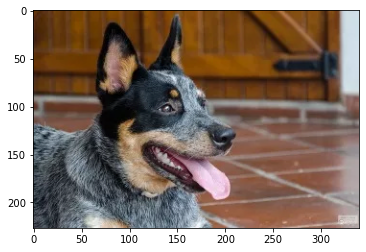

In [5]:
img = grey3d_to_rbg("perro/perro_salida_gray_rojo.jpg", "perro/perro_salida_gray_verde.jpg", "perro/perro_salida_gray_azul.jpg")
plt.imshow(img)

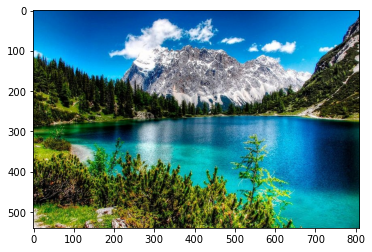

In [6]:
img = grey3d_to_rbg("imagen1/imagen1_salida_gray_rojo.jpg", "imagen1/imagen1_salida_gray_verde.jpg", "imagen1/imagen1_salida_gray_azul.jpg")
plt.imshow(img)

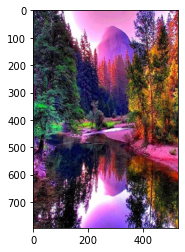

In [7]:
img = grey3d_to_rbg("imagen2/imagen2_salida_gray_rojo.jpg", "imagen2/imagen2_salida_gray_verde.jpg", "imagen2/imagen2_salida_gray_azul.jpg")
plt.imshow(img)

# Problema 3

In [8]:
def rgb_to_gray3d(image):
    img = cv2.imread(image)
    img_name = os.path.splitext(image)
    
    gray_red = np.zeros(img.shape)
    gray_red[:,:,0] = img[:,:,0]
    gray_red[:,:,1] = img[:,:,0]
    gray_red[:,:,2] = img[:,:,0]
    gray_red = gray_red.astype(int)
    
    gray_green = np.zeros(img.shape)
    gray_green[:,:,0] = img[:,:,1]
    gray_green[:,:,1] = img[:,:,1]
    gray_green[:,:,2] = img[:,:,1]
    gray_green = gray_green.astype(int)
    
    gray_blue = np.zeros(img.shape)
    gray_blue[:,:,0] = img[:,:,2]
    gray_blue[:,:,1] = img[:,:,2]
    gray_blue[:,:,2] = img[:,:,2]
    gray_blue = gray_blue.astype(int)
    
    if not os.path.exists(img_name[0]):
        os.mkdir(img_name[0])
    
    cv2.imwrite(f"{os.getcwd()}/{img_name[0]}/{img_name[0]}_gray_red{img_name[1]}", gray_red)
    cv2.imwrite(f"{os.getcwd()}/{img_name[0]}/{img_name[0]}_gray_green{img_name[1]}", gray_green)
    cv2.imwrite(f"{os.getcwd()}/{img_name[0]}/{img_name[0]}_gray_blue{img_name[1]}", gray_blue)
    return [gray_red, gray_green, gray_blue]

(-0.5, 1023.5, 1582.5, -0.5)

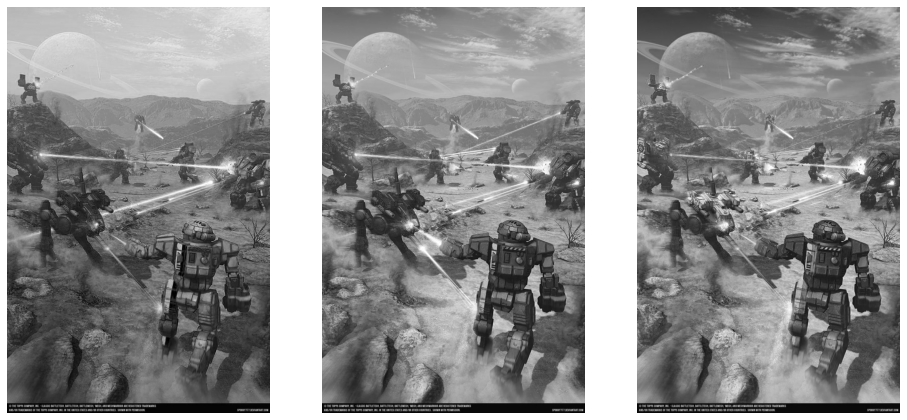

In [9]:
imgs = rgb_to_gray3d("battletech.jpg")

f, axarr = plt.subplots(1,3, figsize=(16,9)) 

axarr[0].imshow(imgs[0])
axarr[0].axis('off')
axarr[1].imshow(imgs[1])
axarr[1].axis('off')
axarr[2].imshow(imgs[2])
axarr[2].axis('off')


# Problema 4

In [10]:
def histographer(image):
    img = cv2.imread(image)
    grayscale = np.mean(img, axis = 2)
    
    f, axarr = plt.subplots(2,2, figsize=(16,9)) 
    
    axarr[0,0].hist(img[:,:,0].flatten(), color="red")
    axarr[0,0].set_title("Red Histogram")
    
    axarr[0,1].hist(img[:,:,1].flatten(), color="green")
    axarr[0,1].set_title("Green Histogram")
    
    axarr[1,0].hist(img[:,:,2].flatten(), color="blue")
    axarr[1,0].set_title("Blue Histogram")
    
    axarr[1,1].hist(grayscale.flatten(), color="gray")
    axarr[1,1].set_title("Gray Histogram")

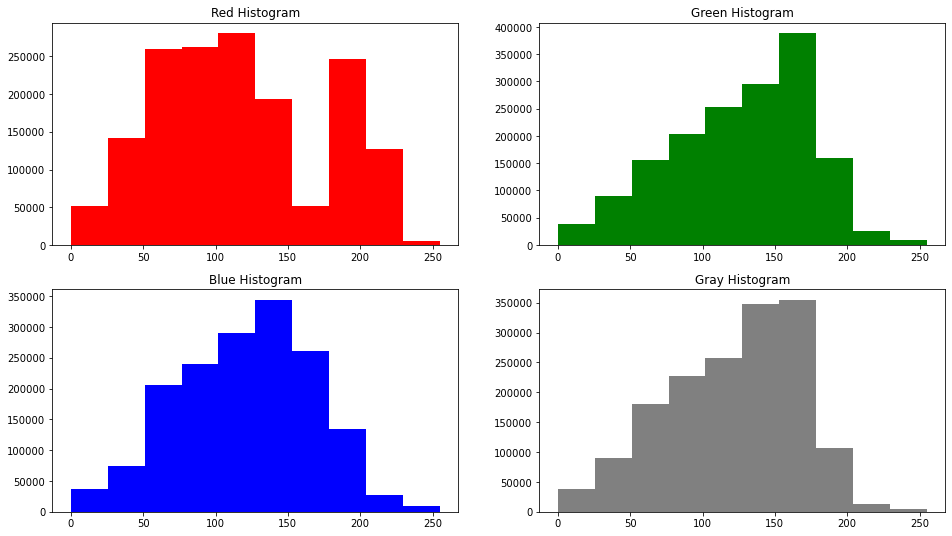

In [11]:
histographer("battletech.jpg")

# Problema 5

El metodo ponderado para convertir a escala de grises es basicamente el mismo al metodo del promedio, con la distincion de que debido a que los diferentes colores contribuyen de manera distinta a lo que los ojos humanos son capaces de percibir, entonces se decide hacer un promedio ponderado, en lugar de un simple promedio, a los colores de una imagen al momento de hacer la conversion a escala de grises.

En este ejercicio se dara un enfasis de 30% al rojo, 60% al verde y 10% al azul.

In [28]:
def rgb_to_wgray(image):
    img = cv2.imread(image)
    grayscale = np.average(img, axis = 2, weights = [0.3, 0.6, 0.1])
    return grayscale.astype(int)

(-0.5, 1023.5, 1543.5, -0.5)

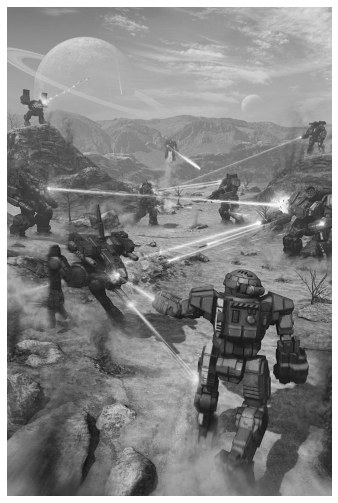

In [29]:
plt.figure(figsize=(16,9))
img = rgb_to_wgray("battletech.jpg")
plt.imshow(img, cmap='gray')
plt.axis("off")

# Problema 6

HSV esta basado en sistema de coordenadas cilindricas y sus siglas son los nombres de las coordenadas dentro de este cilindro. Un punto dentro de un cilidindro puede representarse en coordenadas cilindridas como: El angulo en el que el punto se encuentra con respecto a algun eje fijo, la altura del punto con respecto a un plano perpendicular a la direccion en la que se extiende la altura del cilindro y finalmente el radio o la distancia del punto a el centro del cilindro en el mismo plano donde se define la altura (el radio de la circinferencia creada por un plano intersectando perpendicularmente al cilindro).

Las siglas de HSV representan y se mapean de la siguiente manera:

- H de Hue equivale al angulo. Representa un color dominante.
- S de Saturation equivale al radio. Representa la luz blanca blanca mezclada con el Hue, nos puede indicar que tan palido o vibrante un color resultante sera.
- V de Value equivale a altura. Representa la intensidad del color, variando entre negro hasta el propio color, o blanco cuando la saturacion es 0.

![HSV](HSV.JPG "HSV")